# Imports

In [105]:
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, train_test_split
from sklearn.metrics import classification_report, make_scorer, accuracy_score, plot_roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

# Loading and preparing data

In [106]:
X, y = fetch_covtype(return_X_y=True)

In [107]:
X.shape

(581012, 54)

In [108]:
y.shape

(581012,)

In [109]:
y_new = np.array([1 if y_i == 2 else 0 for y_i in y])

In [110]:
y

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

In [111]:
y_new

array([0, 0, 1, ..., 0, 0, 0])

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y_new,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=42, 
                                                    stratify=y_new)

# Hyperparameters tuning

In [113]:
forest_parameters = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [int(x) for x in np.linspace(10, 50, 5)],
    "max_depth" : [x for x in range(4, 8)],
    "max_features" : ["log2", "sqrt"], 
    "bootstrap" : [True, False]
}

In [114]:
acc_scorer = make_scorer(accuracy_score)

In [115]:
forest = RandomForestClassifier()
forest_grid_search = HalvingGridSearchCV(forest, forest_parameters, cv=3, scoring=acc_scorer)

In [116]:
forest_grid_search.fit(x_train, y_train,)

HalvingGridSearchCV(cv=3, estimator=RandomForestClassifier(),
                    param_grid={'bootstrap': [True, False],
                                'criterion': ['gini', 'entropy'],
                                'max_depth': [4, 5, 6, 7],
                                'max_features': ['log2', 'sqrt'],
                                'n_estimators': [10, 20, 30, 40, 50]},
                    scoring=make_scorer(accuracy_score))

In [117]:
forest_grid_search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'n_estimators': 40}

In [118]:
best_forest = forest_grid_search.best_estimator_

In [132]:
forest_n_estimators = forest_grid_search.cv_results_['param_n_estimators'] 
forest_max_depth = forest_grid_search.cv_results_['param_max_depth']
forest_mean_test_scores = forest_grid_search.cv_results_['mean_test_score']

In [133]:
mean_n_estim_test_score = []

for n_estimators in sorted(set(forest_n_estimators)):
    indexes = (forest_n_estimators == n_estimators)
    mean_n_estim_test_score.append(np.mean(forest_mean_test_scores[indexes]))

In [134]:
mean_max_depth_test_score = []

for max_depth in sorted(set(forest_max_depth)):
    indexes = (forest_max_depth == max_depth)
    mean_max_depth_test_score.append(np.mean(forest_mean_test_scores[indexes]))

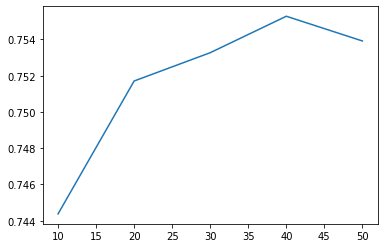

In [121]:
plt.plot(sorted(set(forest_n_estimators)), mean_n_estim_test_score);
plt.show()

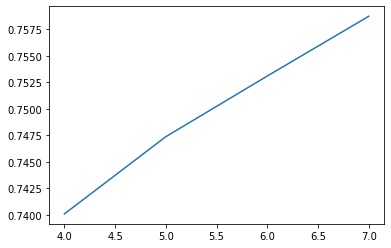

In [135]:
plt.plot(sorted(set(forest_max_depth)), mean_max_depth_test_score);
plt.show()

In [122]:
logreg_parameters = {
    'C' : np.logspace(-3, 5, 50, base=2)
}

In [123]:
logreg = LogisticRegression()
logreg_grid_search = HalvingGridSearchCV(logreg, logreg_parameters, cv=3, scoring=acc_scorer)

In [124]:
logreg_grid_search.fit(x_train, y_train)

HalvingGridSearchCV(cv=3, estimator=LogisticRegression(),
                    param_grid={'C': array([ 0.125     ,  0.13997735,  0.15674927,  0.17553078,  0.19656266,
        0.22011457,  0.24648843,  0.27602238,  0.30909505,  0.34613045,
        0.38760338,  0.43404555,  0.48605237,  0.54429058,  0.60950683,
        0.6825372 ,  0.76431799,  0.85589766,  0.95845029,  1.07329065,
        1.20189105,  1.34590019,  1.50716434,  1.68775096,  1.88997526,
        2.11642982,  2.37001791,  2.65399061,  2.97198858,  3.32808868,
        3.72685628,  4.17340372,  4.67345595,  5.23342383,  5.8604864 ,
        6.56268285,  7.34901563,  8.22956587,  9.21562258, 10.31982742,
       11.55633675, 12.94100316, 14.49157863, 16.22794219, 18.17235475,
       20.3497445 , 22.78802646, 25.51846045, 28.57605177, 32.        ])},
                    scoring=make_scorer(accuracy_score))

In [125]:
logreg_grid_search.best_params_

{'C': 0.19656266450237375}

In [126]:
best_logreg = logreg_grid_search.best_estimator_

# Evaluating models

In [127]:
logreg_preds = best_logreg.predict(x_test)
forest_preds = best_forest.predict(x_test)

In [128]:
print(classification_report(logreg_preds, y_test))

              precision    recall  f1-score   support

           0       0.66      0.61      0.63     95626
           1       0.56      0.61      0.59     78678

    accuracy                           0.61    174304
   macro avg       0.61      0.61      0.61    174304
weighted avg       0.61      0.61      0.61    174304



In [129]:
print(classification_report(forest_preds, y_test))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74     80086
           1       0.80      0.72      0.76     94218

    accuracy                           0.75    174304
   macro avg       0.75      0.75      0.75    174304
weighted avg       0.75      0.75      0.75    174304



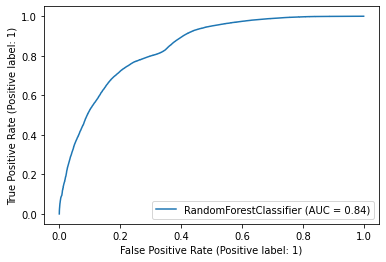

In [130]:
plot_roc_curve(best_forest, x_test, y_test)

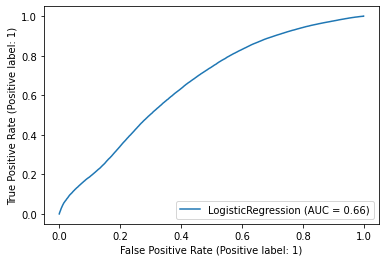

In [131]:
plot_roc_curve(best_logreg, x_test, y_test)